In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('clean_data.csv')

In [8]:
df

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,contains_non_ascii,tokens,token_clean,token_clean_contracted,token_clean_no_stopwords,pos_tagged,lemmatized
0,0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,"April 20, 2013",69,147,False,"['``', 'i', 'have', 'used', 'restasis', 'for',...","['used', 'restasis', 'year', 'seen', 'almost',...","['i', 'have', 'used', 'restasis', 'for', 'abou...","['used', 'restasis', 'year', 'seen', 'almost',...","[('used', 'VBN'), ('restasis', 'NN'), ('year',...","['use', 'restasis', 'year', 'see', 'almost', '..."
1,1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,"August 7, 2016",4,136,False,"['``', 'my', 'experience', 'has', 'been', 'som...","['experience', 'somewhat', 'mixed', 'using', '...","['my', 'experience', 'has', 'been', 'somewhat'...","['experience', 'somewhat', 'mixed', 'using', '...","[('experience', 'NN'), ('somewhat', 'RB'), ('m...","['experience', 'somewhat', 'mixed', 'use', 'im..."
2,2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,"May 11, 2016",6,140,False,"['``', 'this', 'is', 'my', 'second', 'implanon...","['second', 'implanon', 'would', 'recommend', '...","['this', 'is', 'my', 'second', 'implanon', 'wo...","['second', 'implanon', 'would', 'recommend', '...","[('second', 'JJ'), ('implanon', 'NN'), ('would...","['second', 'implanon', 'would', 'recommend', '..."
3,3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,"March 19, 2012",124,104,False,"['``', 'i', 'recommend', 'taking', 'as', 'pres...","['recommend', 'taking', 'prescribed', 'bottle'...","['i', 'recommend', 'taking', 'as', 'prescribed...","['recommend', 'taking', 'prescribed', 'bottle'...","[('recommend', 'NN'), ('taking', 'VBG'), ('pre...","['recommend', 'take', 'prescribed', 'bottle', ..."
4,4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,"August 1, 2010",101,74,False,"['``', 'i', 'have', 'been', 'on', 'ampyra', 'f...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","['i', 'have', 'been', 'on', 'ampyra', 'for', '...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","[('ampyra', 'RB'), ('5', 'CD'), ('days', 'NNS'...","['ampyra', '5', 'day', 'happy', 'new', 'pill',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109677,806,140111,Asenapine,bipolar disorde,"""i had tried many medications to level out my ...",8.0,"September 14, 2016",18,141,False,"['``', 'i', 'had', 'tried', 'many', 'medicatio...","['tried', 'many', 'medications', 'level', 'bip...","['i', 'had', 'tried', 'many', 'medications', '...","['tried', 'many', 'medications', 'level', 'bip...","[('tried', 'VBD'), ('many', 'JJ'), ('medicatio...","['try', 'many', 'medication', 'level', 'bipola..."
109678,807,103534,Synthroid,underactive thyroid,"""had partial thyroid removal with benign tumor...",7.0,"October 27, 2014",61,124,False,"['``', 'had', 'partial', 'thyroid', 'removal',...","['partial', 'thyroid', 'removal', 'benign', 't...","['had', 'partial', 'thyroid', 'removal', 'with...","['partial', 'thyroid', 'removal', 'benign', 't...","[('partial', 'JJ'), ('thyroid', 'NN'), ('remov...","['partial', 'thyroid', 'removal', 'benign', 't..."
109679,808,161014,Risperidone,depression,"""my experience with risperdal started when i f...",8.0,"September 2, 2015",21,130,False,"['``', 'my', 'experience', 'with', 'risperdal'...","['experience', 'risperdal', 'started', 'first'...","['my', 'experience', 'with', 'risperdal', 'sta...","['experience', 'risperdal', 'started', 'first'...","[('experience', 'NN'), ('risperdal', 'NN'), ('...","['experience', 'risperdal', 'start', 'first', ..."
109680,809,132424,Ativan,anxiety,"""my elderly dad was prescribed a low dose of a...",1.0,"March 30, 2009",47,77,False,"['``', 'my', 'elderly', 'dad', 'was', 'prescri...","['elderly', 'dad', 'prescribed', 'low

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
filtered_conditions = df[df['condition'].str.contains('</span>', na=False)]
filtered_conditions

,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,contains_non_ascii,tokens,token_clean,token_clean_contracted,token_clean_no_stopwords,pos_tagged,lemmatized
150,168131,Jolessa,4</span> users found this comment helpful.,"""i am almost on my third month of my first pac...",5.0,"April 25, 2011",4,80,False,"['``', 'i', 'am', 'almost', 'on', 'my', 'third...","['almost', 'third', 'month', 'first', 'pack', ...","['i', 'am', 'almost', 'on', 'my', 'third', 'mo...","['almost', 'third', 'month', 'first', 'pack', ...","[('almost', 'RB'), ('third', 'JJ'), ('month', ...","['almost', 'third', 'month', 'first', 'pack', ..."
260,124318,Skyla,3</span> users found this comment helpful.,"""never pregnant,28,retroverted small (6cm) ute...",1.0,"December 16, 2015",3,103,False,"['``', 'never', 'pregnant,28', ',', 'retrovert...","['never', 'pregnant 28', 'retroverted', 'small...","['never', 'pregnant 28', 'retroverted', 'small...","['never', 'pregnant 28', 'retroverted', 'small...","[('never', 'RB'), ('pregnant 28', 'NN'), ('ret...","['never', 'pregnant 28', 'retrovert', 'small',..."
1158,33552,Microgestin Fe 1 / 20,7</span> users found this comment helpful.,"""i was on junel fe 1/20 and randomly got switc...",3.0,"March 12, 2013",7,128,False,"['``', 'i', 'was', 'on', 'junel', 'fe', '1/20'...","['junel', 'fe', '1 20', 'randomly', 'got', 'sw...","['i', 'was', 'on', 'junel', 'fe', '1 20', 'and...","['junel', 'fe', '1 20', 'randomly', 'got', 'sw...","[('junel', 'NN'), ('fe', 'VBZ'), ('1 20', 'CD'...","['junel', 'fe', '1 20', 'randomly', 'get', 'sw..."
1333,230508,Depo-Provera,2</span> users found this comment helpful.,"""i loved how convenient the shot was and how c...",6.0,"May 18, 2012",2,131,False,"['``', 'i', 'loved', 'how', 'convenient', 'the...","['loved', 'convenient', 'shot', 'cheap', 'pay'...","['i', 'loved', 'how', 'convenient', 'the', 'sh...","['loved', 'convenient', 'shot', 'cheap', 'pay'...","[('loved', 'VBN'), ('convenient', 'NN'), ('sho...","['love', 'convenient', 'shot', 'cheap', 'pay',..."
1336,33054,Seasonique,1</span> users found this comment helpful.,"""i have been taking this birth control for two...",10.0,"January 11, 2011",1,37,False,"['``', 'i', 'have', 'been', 'taking', 'this', ...","['taking', 'birth', 'control', 'two', 'years',...","['i', 'have', 'been', 'taking', 'this', 'birth...","['taking', 'birth', 'control', 'two', 'years',...","[('taking', 'VBG'), ('birth', 'NN'), ('control...","['take', 'birth', 'control', 'two', 'year', 'l..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109019,204288,Dantrium,98</span> users found this comment helpful.,"""i was hit by an uninsured drunk driver in '90...",10.0,"December 25, 2008",98,141,False,"['``', 'i', 'was', 'hit', 'by', 'an', 'uninsur...","['hit', 'uninsured', 'drunk', 'driver', ""'90"",...","['i', 'was', 'hit', 'by', 'an', 'uninsured', '...","['hit', 'uninsured', 'drunk', 'driver', ""'90"",...","[('hit', 'NN'), ('uninsured', 'JJ'), ('drunk',...","['hit', 'uninsured', 'drunk', 'driver', ""'90"",..."
109223,9942,Lo Loestrin Fe,17</span> users found this comment helpful.,"""this is the first birth control i have ever b...",10.0,"November 23, 2013",17,141,False,"['``', 'this', 'is', 'the', 'first', 'birth', ...","['first', 'birth', 'control', 'ever', 'absolut...","['this', 'is', 'the', 'first', 'birth', 'contr...","['first', 'birth', 'control', 'ever', 'absolut...","[('first', 'RB'), ('birth', 'NN'), ('control',...","['first', 'birth', 'control', 'ever', 'absolut..."
109288,168173,Jolessa,3</span> users found this comment helpful.,"""i have been on jolessa for three years. i hav...",5.0,"October 16, 2011",3,43,False,"['``', 'i', 'have', 'been', 'on', 'jolessa', '...","['jolessa', 'three', 'years', 'loved', 'howeve...","['i', 'have', 'been', 'on', 'jolessa', 'for', ...","['jolessa', 'three', 'years', 'loved', 'howeve...","[('jolessa', 'NN'), ('three', 'CD'), ('years',...","['jolessa', 'three', 'year', 'love', 'however'..."
109444,76177,Po

In [11]:
# Xóa tất cả các thẻ HTML kiểu </span> trong cột 'condition'
df['condition'] = df['condition'].str.replace('</span>', '', regex=False)
df['condition'] = df['condition'].str.strip()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109682 entries, 0 to 109681
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   patient_id                109682 non-null  int64  
 1   drugName                  109682 non-null  object 
 2   condition                 109682 non-null  object 
 3   review                    109682 non-null  object 
 4   rating                    109682 non-null  float64
 5   date                      109682 non-null  object 
 6   usefulCount               109682 non-null  int64  
 7   review_length             109682 non-null  int64  
 8   contains_non_ascii        109682 non-null  bool   
 9   tokens                    109682 non-null  object 
 10  token_clean               109682 non-null  object 
 11  token_clean_contracted    109682 non-null  object 
 12  token_clean_no_stopwords  109682 non-null  object 
 13  pos_tagged                109682 non-null  o

Vì cột lemmatized là dạng list (['use', 'restasis', 'year', ...]), cần nối lại thành chuỗi:

In [13]:
df['text'] = df['lemmatized'].apply(lambda x: ''.join(x))

In [14]:
df['text']

,text
0,"['use', 'restasis', 'year', 'see', 'almost', '..."
1,"['experience', 'somewhat', 'mixed', 'use', 'im..."
2,"['second', 'implanon', 'would', 'recommend', '..."
3,"['recommend', 'take', 'prescribed', 'bottle', ..."
4,"['ampyra', '5', 'day', 'happy', 'new', 'pill',..."
...,...
109677,"['try', 'many', 'medication', 'level', 'bipola..."
109678,"['partial', 'thyroid', 'removal', 'benign', 't..."
109679,"['experience', 'risperdal', 'start', 'first', ..."
109680,"['elderly', 'dad', 'prescribe', 'low', 'dose',..."


In [15]:
import ast

def fix_text(text_string):
    try:
        # Chuyển chuỗi thành list
        token_list = ast.literal_eval(text_string)
        # Gộp lại từng từ (bỏ khoảng trắng giữa ký tự)
        fixed_tokens = [''.join(token.split()) for token in token_list]
        return ' '.join(fixed_tokens)
    except:
        return ''

df['text_cleaned'] = df['text'].apply(fix_text)

df['text_cleaned']

,text_cleaned
0,use restasis year see almost progress life red...
1,experience somewhat mixed use implanon nearly ...
2,second implanon would recommend first one okay...
3,recommend take prescribed bottle usually say t...
4,ampyra 5 day happy new pill first 2 day good s...
...,...
109677,try many medication level bipolar disorder rel...
109678,partial thyroid removal benign tumor 30 year a...
109679,experience risperdal start first start see psy...
109680,elderly dad prescribe low dose ativan anxiety ...


Kiểm tra phân bố Rating

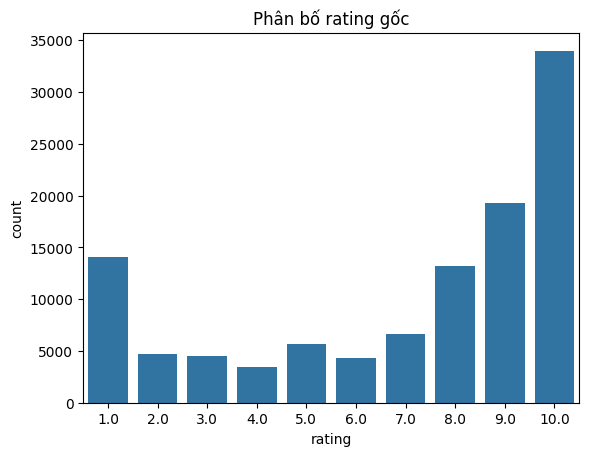

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='rating')
plt.title("Phân bố rating gốc")
plt.show()

In [17]:
def map_sentiment(rating):
    if rating >= 5:
        return 'positive'
    elif rating < 5:
        return 'negative'
df['sentiment'] = df['rating'].apply(map_sentiment)

<Axes: xlabel='sentiment', ylabel='count'>

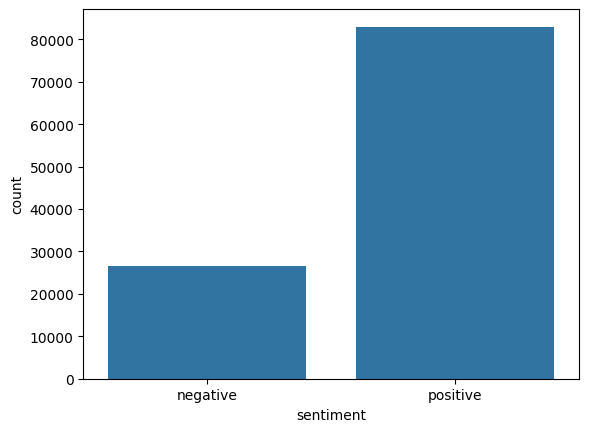

In [18]:
import seaborn as sns
sns.countplot(data=df, x='sentiment')


In [19]:
print(df['sentiment'].value_counts())

sentiment
positive    82994
negative    26688
Name: count, dtype: int64


Chuyển văn bản thành ma trận số để huấn luyện mô hình. (TF-IDF)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=7000,
    ngram_range=(1,2),
    stop_words='english',
    min_df=5,
    max_df=0.8
)

X = vectorizer.fit_transform(df['text_cleaned'])
y = df['sentiment']

**LÚC NÀY QUAY TRỞ VỀ BÀI TOÁN PHÂN LOẠI CƠ BẢN THUI**

train/test split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 87745 samples
Test set: 21937 samples


ROS

In [23]:
# In bảng phân bố các lớp trong tập huấn luyện
print(y_train.value_counts())

sentiment
positive    66395
negative    21350
Name: count, dtype: int64


In [24]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [25]:
# In bảng phân bố các lớp trong tập huấn luyện
print(y_resampled.value_counts())

sentiment
negative    66395
positive    66395
Name: count, dtype: int64


**VotingClassifier**

In [26]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Các mô hình thành phần
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)

# VotingClassifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lgbm', lgbm)],
    voting='soft',
    n_jobs=-1
)

# Huấn luyện với dữ liệu đã oversample
voting_clf.fit(X_resampled, y_resampled)

# Dự đoán trên tập test gốc (chưa oversample)
y_pred = voting_clf.predict(X_test)

# Đánh giá
print("Classification Report (VotingClassifier):")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Classification Report (VotingClassifier):
              precision    recall  f1-score   support

    negative       0.68      0.79      0.73      5338
    positive       0.93      0.88      0.90     16599

    accuracy                           0.86     21937
   macro avg       0.81      0.84      0.82     21937
weighted avg       0.87      0.86      0.86     21937



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AUC Score (VotingClassifier): 0.9200


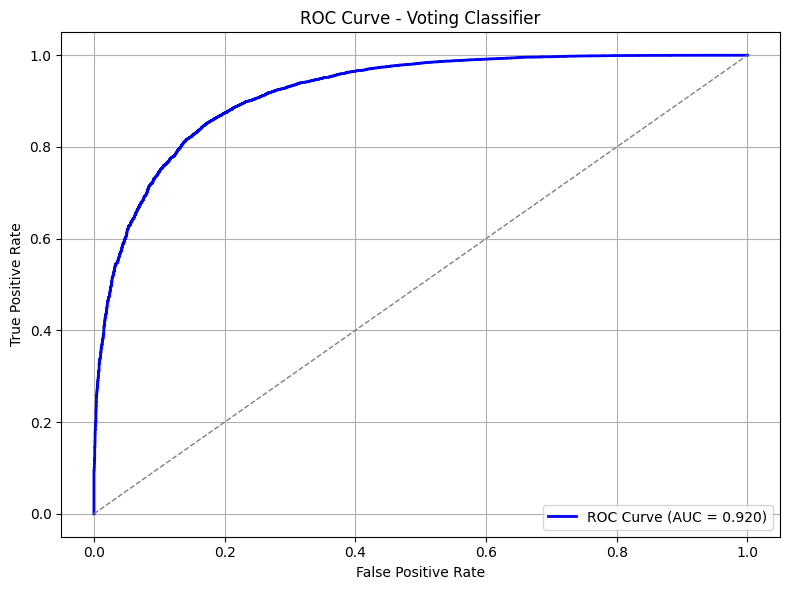

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Nếu y_test là dạng chuỗi → cần encode thành 0/1
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Dự đoán xác suất (xác suất class positive)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# Tính FPR, TPR cho ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_proba)
roc_auc = auc(fpr, tpr)

# In AUC Score
print(f"AUC Score (VotingClassifier): {roc_auc:.4f}")

# Vẽ ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

**StackingClassifier**

In [30]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
# Base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

# Meta model
meta_model = LogisticRegression(max_iter=1000)

# StackingClassifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Huấn luyện
stacking_clf.fit(X_resampled, y_resampled)

# Dự đoán
y_pred = stacking_clf.predict(X_test)

# Đánh giá
print("Classification Report (StackingClassifier):")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Classification Report (StackingClassifier):
              precision    recall  f1-score   support

    negative       0.96      0.48      0.64      5338
    positive       0.86      0.99      0.92     16599

    accuracy                           0.87     21937
   macro avg       0.91      0.74      0.78     21937
weighted avg       0.88      0.87      0.85     21937



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AUC Score (StackingClassifier): 0.9317


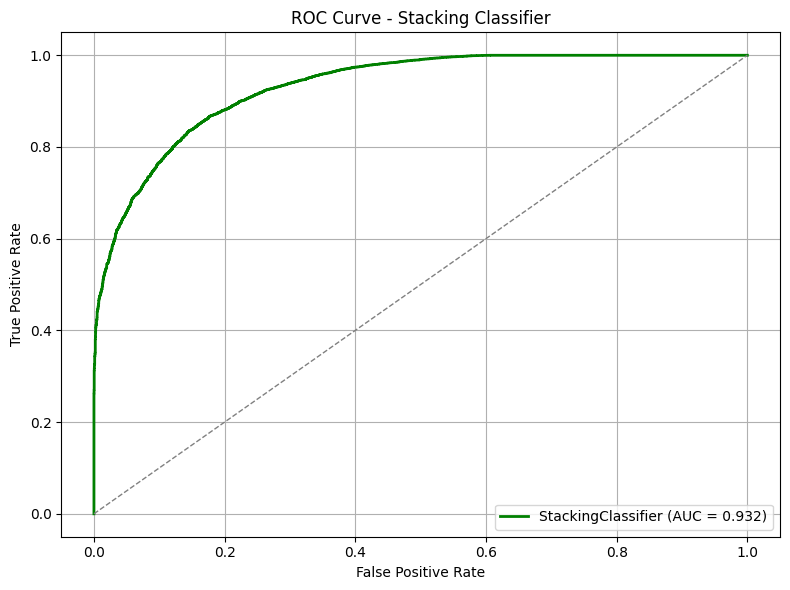

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Encode y_test nếu là chuỗi ('negative', 'positive') → số (0, 1)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Dự đoán xác suất class positive (lớp 1)
y_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Tính ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_proba)
roc_auc = auc(fpr, tpr)

# In AUC Score
print(f"AUC Score (StackingClassifier): {roc_auc:.4f}")

# Vẽ ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'StackingClassifier (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_resampled, y_resampled)
best_rf = grid_rf.best_estimator_


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [33]:
from sklearn.preprocessing import LabelEncoder

# Mã hóa nhãn từ 'negative', 'positive' thành 0, 1
encoder = LabelEncoder()
y_resampled_encoded = encoder.fit_transform(y_resampled)  # Mã hóa nhãn

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Định nghĩa XGBoost và tham số grid search
xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

# Khởi tạo GridSearchCV và huấn luyện mô hình
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='f1_macro', n_jobs=-1)
grid_xgb.fit(X_resampled, y_resampled_encoded)  # Dùng y_resampled_encoded thay vì y_resampled
best_xgb = grid_xgb.best_estimator_

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:15:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [35]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [10, -1],
    'learning_rate': [0.05, 0.1]
}

grid_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=3, scoring='f1_macro', n_jobs=-1)
grid_lgbm.fit(X_resampled, y_resampled_encoded)
best_lgbm = grid_lgbm.best_estimator_


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 66395, number of negative: 66395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 20.330084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 674552
[LightGBM] [Info] Number of data points in the train set: 132790, number of used features: 7000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [36]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lgbm', best_lgbm)
    ],
    voting='soft',  # hoặc 'hard'
    n_jobs=-1
)

voting_clf.fit(X_resampled, y_resampled)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_poli...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgbm',
                              LGBMClassifier(n_estimators=200,
                                             random_state=42))],
                 n_jobs=-1, voting='soft')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.48      0.64      5338
           1       0.86      0.99      0.92     16599

    accuracy                           0.87     21937
   macro avg       0.91      0.74      0.78     21937
weighted avg       0.88      0.87      0.85     21937

Confusion Matrix:
[[ 2579  2759]
 [  112 16487]]


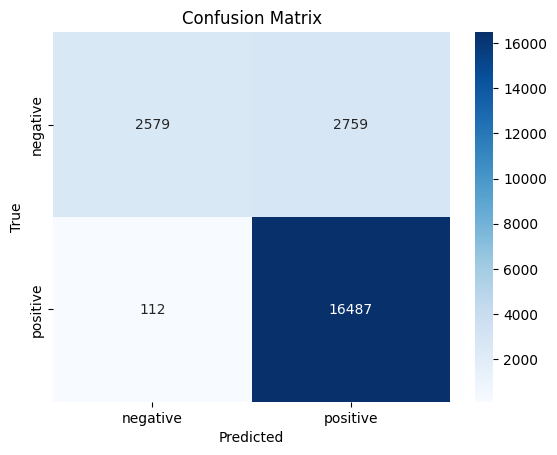

AUC: 0.9232


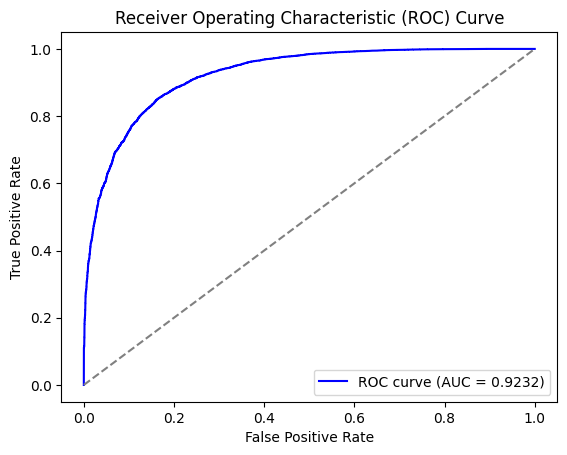

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Chuyển đổi nhãn từ 'negative', 'positive' sang 0, 1
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Dự đoán xác suất cho lớp 1 (positive class)
y_prob = voting_clf.predict_proba(X_test)[:, 1]

# In bảng kết quả chi tiết
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_encoded))

# In Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
print('Confusion Matrix:')
print(cm)

# Vẽ Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Tính và in AUC
auc = roc_auc_score(y_test_encoded, y_prob)
print(f'AUC: {auc:.4f}')

# Vẽ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()